# PUBG Data Analysis

In [43]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

In [4]:
train_dataset = pd.read_csv('C:/Users/ashwi/Desktop/train_V2.csv')
test_dataset = pd.read_csv('C:/Users/ashwi/Desktop/test_V2.csv')


In [5]:
train_dataset.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [6]:
test_dataset.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


# Remove NAN values from dataset 

An entire row in the dataset is filled with nan values , therefore we delete the entire row

In [7]:
train_dataset.dropna()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,...,0,0.0000,0,0.000,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,...,0,0.0000,0,0.000,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0000,0,0.000,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,...,0,0.0000,0,0.000,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,...,0,0.0000,0,0.000,0,0,65.67,1,0,0.2143


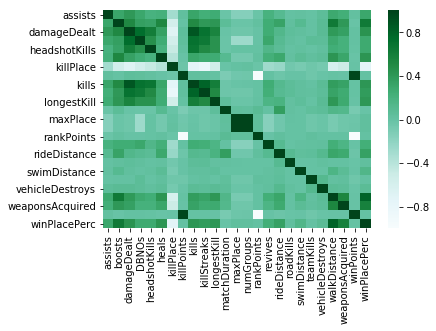

In [45]:
sns.heatmap(train_dataset.corr(), cmap='BuGn')
plt.show()

From the above heatmap we can observe the correlation between the featuers and the target (winPlacePerc) and consider only the features that have a high correlation with the target

# Visualizing the highly correlated features

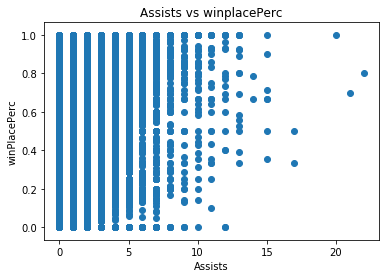

In [9]:
plt.scatter(train_dataset['assists'],train_dataset['winPlacePerc'])
plt.xlabel('Assists')
plt.ylabel("winPlacePerc")
plt.title("Assists vs winplacePerc")
plt.show()

In [10]:
train_dataset["assists"].describe()

count    4.446966e+06
mean     2.338149e-01
std      5.885731e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64

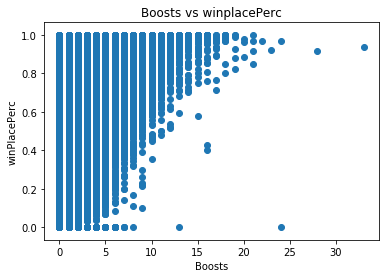

In [11]:
plt.scatter(train_dataset['boosts'],train_dataset['winPlacePerc'])
plt.xlabel('Boosts')
plt.ylabel("winPlacePerc")
plt.title("Boosts vs winplacePerc")
#plt.savefig("Boosts vs winplacePerc.jpg")
plt.show()


In [12]:
train_dataset["boosts"].describe()

count    4.446966e+06
mean     1.106908e+00
std      1.715794e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      3.300000e+01
Name: boosts, dtype: float64

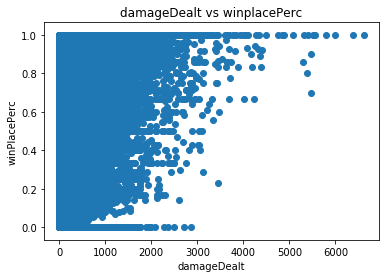

In [13]:
plt.scatter(train_dataset['damageDealt'],train_dataset['winPlacePerc'])
plt.xlabel('damageDealt')
plt.ylabel("winPlacePerc")
plt.title("damageDealt vs winplacePerc")
#plt.savefig("damageDealt vs winplacePerc.jpg")
plt.show()


In [14]:
train_dataset["damageDealt"].describe()

count    4.446966e+06
mean     1.307171e+02
std      1.707806e+02
min      0.000000e+00
25%      0.000000e+00
50%      8.424000e+01
75%      1.860000e+02
max      6.616000e+03
Name: damageDealt, dtype: float64

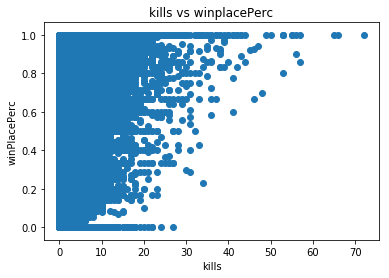

In [15]:
plt.scatter(train_dataset['kills'],train_dataset['winPlacePerc'])
plt.xlabel('kills')
plt.ylabel("winPlacePerc")
plt.title("kills vs winplacePerc")
#plt.savefig("kills vs winplacePerc.jpg")
plt.show()

In [16]:
train_dataset["kills"].describe()

count    4.446966e+06
mean     9.247833e-01
std      1.558445e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.200000e+01
Name: kills, dtype: float64

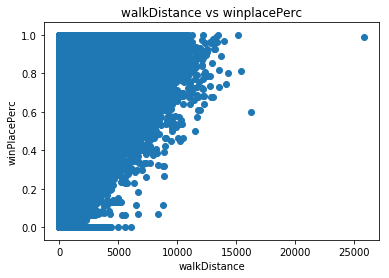

In [17]:
plt.scatter(train_dataset['walkDistance'],train_dataset['winPlacePerc'])
plt.xlabel('walkDistance')
plt.ylabel("winPlacePerc")
plt.title("walkDistance vs winplacePerc")
#plt.savefig("walkDistance vs winplacePerc.jpg")
plt.show()

In [18]:
train_dataset["walkDistance"].describe()

count    4.446966e+06
mean     1.154218e+03
std      1.183497e+03
min      0.000000e+00
25%      1.551000e+02
50%      6.856000e+02
75%      1.976000e+03
max      2.578000e+04
Name: walkDistance, dtype: float64

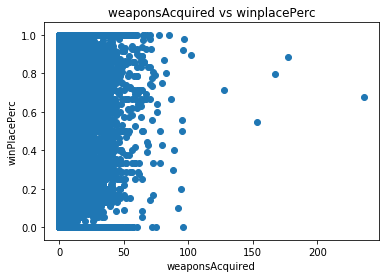

In [19]:
plt.scatter(train_dataset['weaponsAcquired'],train_dataset['winPlacePerc'])
plt.xlabel('weaponsAcquired')
plt.ylabel("winPlacePerc")
plt.title("weaponsAcquired vs winplacePerc")
#plt.savefig("weaponsAcquired vs winplacePerc.jpg")
plt.show()

In [20]:
train_dataset["weaponsAcquired"].describe()

count    4.446966e+06
mean     3.660488e+00
std      2.456544e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      2.360000e+02
Name: weaponsAcquired, dtype: float64

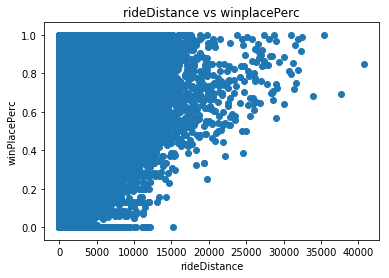

In [21]:
plt.scatter(train_dataset['rideDistance'],train_dataset['winPlacePerc'])
plt.xlabel('rideDistance')
plt.ylabel("winPlacePerc")
plt.title("rideDistance vs winplacePerc")
#plt.savefig("rideDistance vs winplacePerc.jpg")
plt.show()

In [22]:
train_dataset["rideDistance"].describe()

count    4.446966e+06
mean     6.061157e+02
std      1.498344e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.909750e-01
max      4.071000e+04
Name: rideDistance, dtype: float64

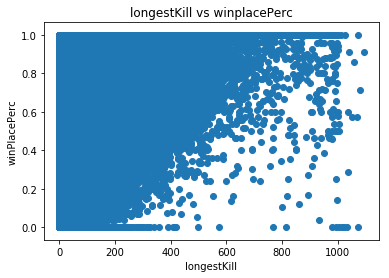

In [23]:
plt.scatter(train_dataset['longestKill'],train_dataset['winPlacePerc'])
plt.xlabel('longestKill')
plt.ylabel("winPlacePerc")
plt.title("longestKill vs winplacePerc")
#plt.savefig("longestKill vs winplacePerc.jpg")
plt.show()

In [24]:
train_dataset["longestKill"].describe()

count    4.446966e+06
mean     2.299759e+01
std      5.097262e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.132000e+01
max      1.094000e+03
Name: longestKill, dtype: float64

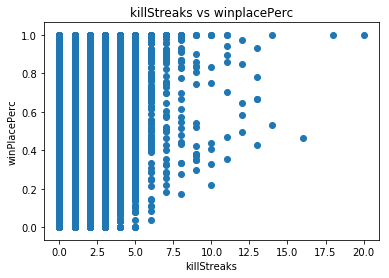

In [25]:
plt.scatter(train_dataset['killStreaks'],train_dataset['winPlacePerc'])
plt.xlabel('killStreaks')
plt.ylabel("winPlacePerc")
plt.title("killStreaks vs winplacePerc")
#plt.savefig("killStreaks vs winplacePerc.jpg")
plt.show()

In [26]:
train_dataset["killStreaks"].describe()

count    4.446966e+06
mean     5.439551e-01
std      7.109721e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.000000e+01
Name: killStreaks, dtype: float64

# Choosing features from dataset

In [27]:
X = train_dataset.iloc[:,[4,5,8,11,12,13,20,25,26]].values
Y = train_dataset.iloc[:,-1:].values

# Replacing nan values with mean value

In [28]:
imputer_y =Imputer()
imputer_y = imputer_y.fit(Y)
Y = imputer_y.transform(Y)

Checking nan values

In [29]:
new = pd.DataFrame(Y)
new.isnull().sum()


0    0
dtype: int64

# Training the model[Random Forest Regression]

In [30]:
regressor = RandomForestRegressor(n_estimators=50,random_state=1)
regressor.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

# Predicting the dependent variable 

In [31]:
X_test = test_dataset.iloc[:,[4,5,8,11,12,13,20,25,26]].values

In [32]:
Y_pred = regressor.predict(X_test)

In [33]:
pred = pd.DataFrame(Y_pred)


In [34]:
pred.head(10)

,0
0,0.340956
1,0.811032
2,0.357870
3,0.608246
4,0.915576
5,0.030208
6,0.708480
7,0.487666
8,0.579236
9,0.517848


In [35]:
submission=pd.DataFrame()

In [36]:
submission['Id']=test_dataset['Id']

In [37]:
submission['winPlacePerc']=pred

In [40]:
submission.head(5)

,Id,winPlacePerc
0,9329eb41e215eb,0.340956
1,639bd0dcd7bda8,0.811032
2,63d5c8ef8dfe91,0.357870
3,cf5b81422591d1,0.608246
4,ee6a295187ba21,0.915576


# For the above model it has prediction accuracy of 78% 